In [2]:
#begins section 7.1

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [4]:
df_penguins=sns.load_dataset("penguins")

In [5]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df_penguins.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [7]:
#looking at our quantitative data
df_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
#looking at our categorical data
df_penguins.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,168


In [9]:
#looks like we are missing the sex for a few penguins
#since we still have a fairly large dataset lets remove these to avoid
#odd visualizations
df_penguins = df_penguins[df_penguins["sex"].notnull()]

In [10]:
#looking at our categorical data
df_penguins.describe(include=['O'])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,146,163,168


In [11]:
#looking for missing values
df_penguins.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
#all set on the cleaning!

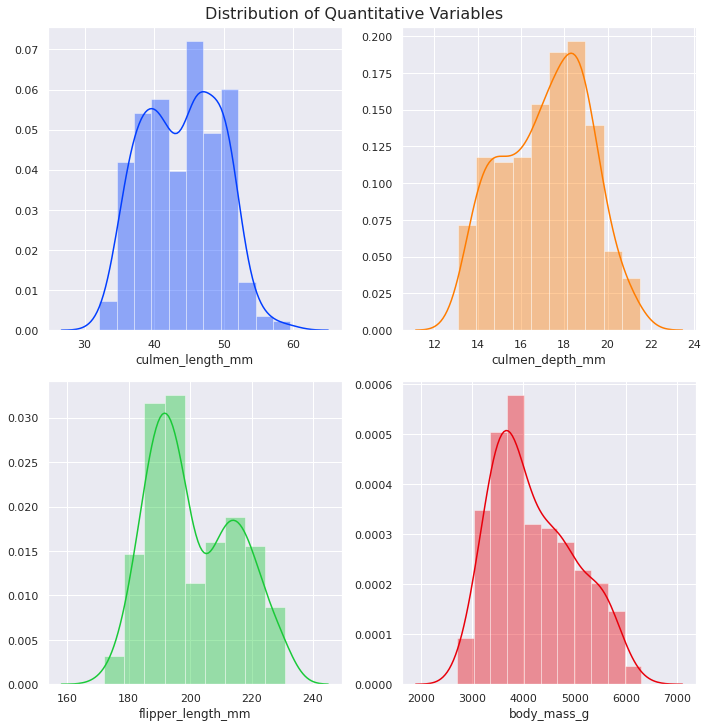

In [13]:
sns.set(color_codes=True)
#choosing a color palette from seaborn
#options: pastel, muted, bright, deep, colorblind, dark
#tons of other ways to do this as well!
colors = sns.color_palette("bright")

#first lets set up our plotting area, this gives us 9 potential spots to plot
fig,axes = plt.subplots(2,2, figsize = (10,10))

sns.distplot(df_penguins["culmen_length_mm"], color = colors[0], ax = axes[0,0])
sns.distplot(df_penguins["culmen_depth_mm"], color = colors[1], ax = axes[0,1])
sns.distplot(df_penguins["flipper_length_mm"], color = colors[2], ax = axes[1,0])
sns.distplot(df_penguins["body_mass_g"], color = colors[3], ax = axes[1,1])

plt.suptitle("Distribution of Quantitative Variables", y= 1.01, size = 16)
plt.tight_layout()
plt.show()

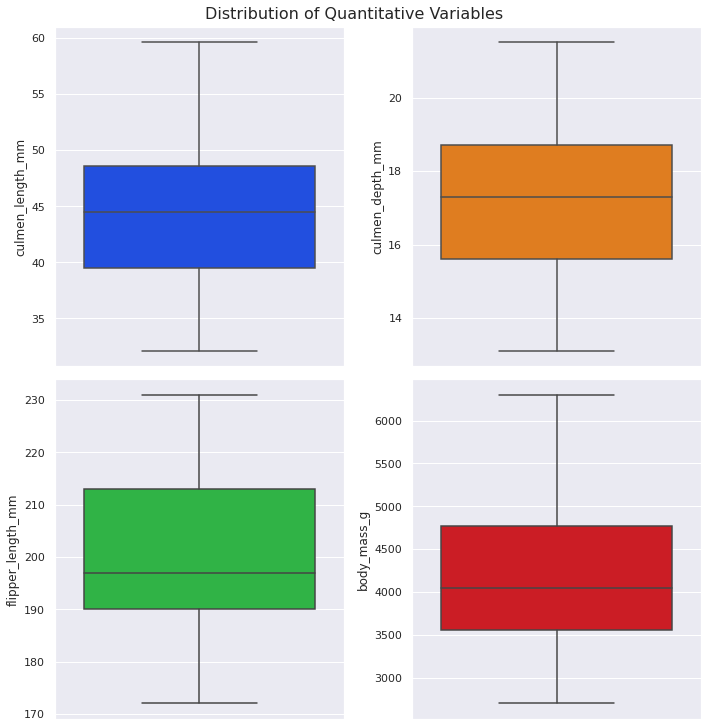

In [15]:
sns.set(color_codes=True)
#choosing a color palette from seaborn
#options: pastel, muted, bright, deep, colorblind, dark
#tons of other ways to do this as well!
colors = sns.color_palette("bright")

#first lets set up our plotting area, this gives us 9 potential spots to plot
fig,axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y=df_penguins["culmen_length_mm"], color = colors[0], ax = axes[0,0])
sns.boxplot(y=df_penguins["culmen_depth_mm"], color = colors[1], ax = axes[0,1])
sns.boxplot(y=df_penguins["flipper_length_mm"], color = colors[2], ax = axes[1,0])
sns.boxplot(y=df_penguins["body_mass_g"], color = colors[3], ax = axes[1,1])

plt.suptitle("Distribution of Quantitative Variables", y= 1.01, size = 16)
plt.tight_layout()
plt.show()

In [ ]:
#this ends section 7.1

In [ ]:
#this begins section 7.2

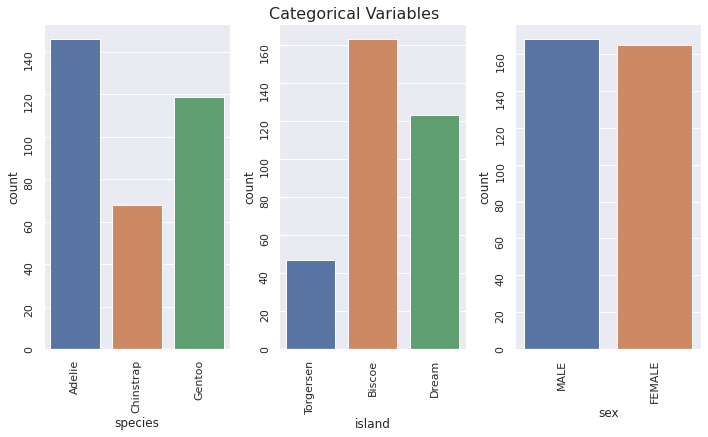

In [16]:
#examining categorical data wit some catplots
sns.set(color_codes=True)
#choosing a color palette from seaborn
#options: pastel, muted, bright, deep, colorblind, dark
#tons of other ways to do this as well!
colors = sns.color_palette("bright")

#first lets set up our plotting area, this gives us 9 potential spots to plot
fig,axes = plt.subplots(1,3, figsize = (10,6))

sns.countplot("species", data = df_penguins ,ax = axes[0])
sns.countplot("island", data = df_penguins ,ax = axes[1])
sns.countplot("sex", data = df_penguins ,ax = axes[2])

#quick for loop in order to access all of the subplots axes
for ax in fig.axes:
    ax.tick_params(labelrotation=90)

plt.suptitle("Categorical Variables", y= 1.01, size = 16)
plt.tight_layout()
plt.show()

In [17]:
#looks like our male/female split is good

#not too concerned about the islands for our purposes today

#however, in terms of species there is definetly varying samples sizes

#lets adjust our data by first removing the 'island' column

#then looking closer at the species column, to create a new sample data set that is equally representative

#this will avoid bias as we build out classification models

In [18]:
df_penguins = df_penguins.drop(columns = "island", axis = 0)

In [19]:
df_penguins["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [20]:
#look like we have 68 chinstrap, so lets get 68 randomly selected from the other two, then create a new df!
adelie = df_penguins[df_penguins["species"] == "Adelie"].sample(n=68)
gentoo = df_penguins[df_penguins["species"] == "Gentoo"].sample(n=68)

#getting the entire Chinstrap sample
chinstrap = df_penguins[df_penguins["species"] == "Chinstrap"].sample(n=68)

In [21]:
#technique keeps this is as dataframe
type(gentoo)

pandas.core.frame.DataFrame

In [22]:
#now we need to merge these together for our new dataframe
#axis = 0 implies a vertical concat
new_peng = pd.concat([adelie, gentoo, chinstrap], axis = 0)

In [23]:
type(new_peng)

pandas.core.frame.DataFrame

In [24]:
new_peng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 150 to 157
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            204 non-null    object 
 1   culmen_length_mm   204 non-null    float64
 2   culmen_depth_mm    204 non-null    float64
 3   flipper_length_mm  204 non-null    float64
 4   body_mass_g        204 non-null    float64
 5   sex                204 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.2+ KB


In [25]:
new_peng

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
150,Adelie,36.0,17.1,187.0,3700.0,FEMALE
27,Adelie,40.5,17.9,187.0,3200.0,FEMALE
16,Adelie,38.7,19.0,195.0,3450.0,FEMALE
65,Adelie,41.6,18.0,192.0,3950.0,MALE
21,Adelie,37.7,18.7,180.0,3600.0,MALE
...,...,...,...,...,...,...
174,Chinstrap,43.2,16.6,187.0,2900.0,FEMALE
210,Chinstrap,50.2,18.8,202.0,3800.0,MALE
178,Chinstrap,50.5,18.4,200.0,3400.0,FEMALE
170,Chinstrap,46.4,18.6,190.0,3450.0,FEMALE


In [26]:
#now the last thing we need to do is our one hot encoding of the variables "sex", except we dont want to lose the species column...
#that means we'll do this in portions, then merge into our final dataframe we will utilize!
peng_sex = pd.get_dummies(new_peng["sex"])

#dropping sex column from new_peng now before putting the one hot encoded column on with a merge
new_peng = new_peng.drop(columns= "sex", axis = 0)

#axis = 1 implies a horizontal concat
final_df = pd.concat([new_peng, peng_sex], axis = 1)

In [27]:
final_df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
150,Adelie,36.0,17.1,187.0,3700.0,1,0
27,Adelie,40.5,17.9,187.0,3200.0,1,0
16,Adelie,38.7,19.0,195.0,3450.0,1,0
65,Adelie,41.6,18.0,192.0,3950.0,0,1
21,Adelie,37.7,18.7,180.0,3600.0,0,1
...,...,...,...,...,...,...,...
174,Chinstrap,43.2,16.6,187.0,2900.0,1,0
210,Chinstrap,50.2,18.8,202.0,3800.0,0,1
178,Chinstrap,50.5,18.4,200.0,3400.0,1,0
170,Chinstrap,46.4,18.6,190.0,3450.0,1,0


In [198]:
#random state, pick a #, ensures that if we go back and re execute code that the 'random' selected data will be consistent
#this creates out two dataframes to pull from to build models, and then unbiasly test them
#we use a very high test size of 0.5, this data is actually pretty easy to classify so we want a challenge
train_df, test_df = train_test_split(final_df, test_size=0.5, random_state=32)

In [199]:
#separating our testing data into two data frames, separating the price column for later evaluation
#make sure to copy the column before dropping it in the second line here
#for now we'll also drop the categorical variables, those will require additional methods for analysis
Y_test = test_df["species"]

X_test = test_df.drop(columns= ["species"], axis = 1)

Y_train = train_df["species"]

X_train = train_df.drop(columns= ["species"], axis = 1)

In [200]:
#this ends section 7.2

In [201]:
#begins section 7.3

In [202]:
#make sure to rerun ALLLLLLLLLLLLLLLL code above!!!

In [203]:
#out first step will be to due some processing of our data that we'll later use with our heat maps to make them look better!

In [204]:
#binarizing each categorical classification
final_df['spec_id'] = final_df['species'].factorize()[0]

#building in needed dictionaries for later use
spec_id_df = final_df[['species', 'spec_id']].drop_duplicates().sort_values('spec_id')

In [205]:
#building our classifier for naive bayes
model_NB = MultinomialNB()

In [206]:
model_NB.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [207]:
Y_pred_NB = model_NB.predict(X_test)

In [208]:
#building confusion matrix for this classifier
NB_conf_matrix = confusion_matrix(Y_test, Y_pred_NB)

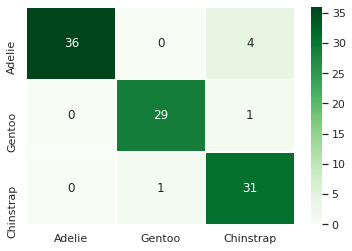

In [209]:
#heatmap & confusion matrix for NB
sns.set(color_codes=True)
sns.heatmap(NB_conf_matrix, cmap='Greens', annot = True, linewidths=.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)
plt.show()

In [210]:
#printing out the classification reports
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_NB))

Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       1.00      0.90      0.95        40
   Chinstrap       0.97      0.97      0.97        30
      Gentoo       0.86      0.97      0.91        32

    accuracy                           0.94       102
   macro avg       0.94      0.95      0.94       102
weighted avg       0.95      0.94      0.94       102



In [211]:
#how to interpret this

#Precision is the ability of a classifier not to label an instance positive that is actually negative. 
#For each class it is defined as the ratio of true positives to the sum of true and false positives.

#Recall is the ability of a classifier to find all positive instances. 
#For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores 
#are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should 
#be used to compare classifier models, not global accuracy.

#supprt is number of given samples for each

In [212]:
#this ends section 7.3

In [213]:
#this begins section 7.4

In [214]:
#make sure to rerun ALLLLLLLLLLLLLLLL code above!!!

In [215]:
#building our classifier for log reg
#adjusting for more than 2 classifications & upping max iterations!
model_log = LogisticRegression(multi_class='multinomial',max_iter = 10000)

In [216]:
model_log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
Y_pred_LOG = model_log.predict(X_test)

In [218]:
#building confusion matrix for this classifier
LOG_conf_matrix = confusion_matrix(Y_test, Y_pred_LOG)

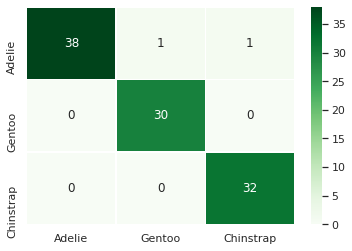

In [219]:
#heatmap & confusion matrix for NB
sns.set(color_codes=True)
sns.heatmap(LOG_conf_matrix, cmap='Greens', annot = True, linewidths=.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)
plt.show()

In [220]:
#printing out the classification reports
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_LOG))

Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        40
   Chinstrap       0.97      1.00      0.98        30
      Gentoo       0.97      1.00      0.98        32

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [221]:
#how to interpret this

#Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

#Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores 
#are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should 
#be used to compare classifier models, not global accuracy.

#supprt is number of given samples for each

In [222]:
#this ends section 7.4

In [223]:
#this begins section 7.5

In [251]:
#building our classifier for naive bayes
model_KN = KNeighborsClassifier()

In [252]:
model_KN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [253]:

Y_pred_KN = model_KN.predict(X_test)

In [254]:
#building confusion matrix for this classifier
KN_conf_matrix = confusion_matrix(Y_test, Y_pred_KN)

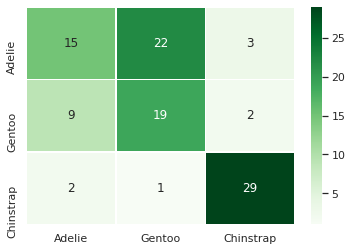

In [255]:
#heatmap & confusion matrix for NB
sns.set(color_codes=True)
sns.heatmap(KN_conf_matrix, cmap='Greens', annot = True, linewidths=.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)
plt.show()

In [256]:
#printing out the classification reports
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_KN))

Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       0.58      0.38      0.45        40
   Chinstrap       0.45      0.63      0.53        30
      Gentoo       0.85      0.91      0.88        32

    accuracy                           0.62       102
   macro avg       0.63      0.64      0.62       102
weighted avg       0.63      0.62      0.61       102



In [230]:
#how to interpret this

#Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

#Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores 
#are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should 
#be used to compare classifier models, not global accuracy.

#supprt is number of given samples for each

In [231]:
#this ends section 7.5

In [232]:
#this begins section 7.6

In [233]:
#building our classifier for SVM
model_SVM = SVC()

In [234]:
model_SVM.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [235]:
Y_pred_SVM = model_SVM.predict(X_test)

In [236]:
#building confusion matrix for this classifier
SVM_conf_matrix = confusion_matrix(Y_test, Y_pred_SVM)

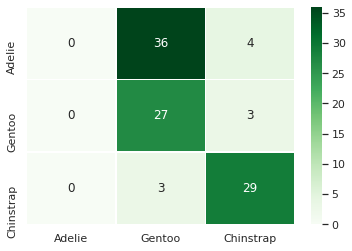

In [237]:
#heatmap & confusion matrix for NB
sns.set(color_codes=True)
sns.heatmap(SVM_conf_matrix, cmap='Greens', annot = True, linewidths=.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)
plt.show()

In [238]:
#printing out the classification reports
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_SVM))

Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00        40
   Chinstrap       0.41      0.90      0.56        30
      Gentoo       0.81      0.91      0.85        32

    accuracy                           0.55       102
   macro avg       0.40      0.60      0.47       102
weighted avg       0.37      0.55      0.43       102



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
#how to interpret this

#Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

#Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores 
#are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should 
#be used to compare classifier models, not global accuracy.

#supprt is number of given samples for each

In [240]:
#this ends section 7.6

In [241]:
#this begins section 7.7

In [242]:
#building our classifier for random forest
model_RF = RandomForestClassifier()

In [243]:
model_RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [244]:
Y_pred_RF = model_RF.predict(X_test)

In [245]:
#building confusion matrix for this classifier
RF_conf_matrix = confusion_matrix(Y_test, Y_pred_RF)

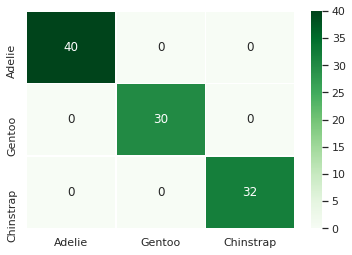

In [246]:
#heatmap & confusion matrix for NB
sns.set(color_codes=True)
sns.heatmap(RF_conf_matrix, cmap='Greens', annot = True, linewidths=.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)
plt.show()

In [247]:
#printing out the classification reports
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_RF))

Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      1.00      1.00        30
      Gentoo       1.00      1.00      1.00        32

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



In [248]:
#how to interpret this

#Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

#Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores 
#are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should 
#be used to compare classifier models, not global accuracy.

#supprt is number of given samples for each

In [249]:
#this ends section 7.7

In [250]:
#this begins section 7.8

In [258]:
#lets rename some things here to make this model more understandable
features = X_train.copy()
targets = Y_train.copy()

#defining the models we want to compare

models = [
          MultinomialNB(),
          LogisticRegression(multi_class='multinomial',max_iter = 10000),
          KNeighborsClassifier(),
          SVC(),
          RandomForestClassifier()
]

#setting up the instructions for our comparison tool

#Number of cross validation to performs, 5 is standard number
CV = 5
#creating our cross validation data frame
cv_df = pd.DataFrame(index=range(CV * len(models)))
#empty initial list for entries in our dataframe
entries = []
#outer for loop to execute our cross validations of the above models
for model in models:
  #accessing model information class
  model_name = model.__class__.__name__
  #getting parameters of model to calculate R2
  accuracies = cross_val_score(model, features, targets, scoring='accuracy', cv=CV)
  #inner for loop to fill the entries list to build the ending dataframe
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    #finalizing the dataframe with appended entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

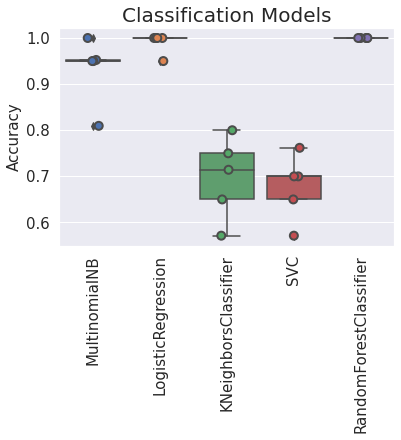

In [259]:
#visualizing the results
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Classification Models', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.show()

In [260]:
#looking at average r squared
final_comp = cv_df.groupby('model_name').accuracy.mean().reset_index().sort_values(by = "accuracy", ascending = False)
final_comp

,model_name,accuracy
3,RandomForestClassifier,1.000000
1,LogisticRegression,0.990000
2,MultinomialNB,0.932381
0,KNeighborsClassifier,0.697143
4,SVC,0.676667


In [261]:
#go back and drop off KNN and and SVC redo these both again!

In [262]:
#this ends section 7.8

In [263]:
#this begins section 7.9

In [264]:
#lets say we want to work more with optimizing Multinomial NB

In [266]:
#grid search cross validation to optimize our Random Forest Regressor
regressor = MultinomialNB()

In [267]:
grid = {
    "alpha" : [0.1,0.3,0.5,0.7,1.0],
    "fit_prior" : ["True","False"]
}

In [270]:
grid_apply = GridSearchCV(regressor, grid, scoring= "accuracy", cv = 5, refit = True, verbose = 0)

In [272]:
#very quick
grid_apply.fit(features,targets)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'fit_prior': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [273]:
#looking at the best outcome scenario in terms of r squared
best_perf = grid_apply.best_score_

#looking for the best parameters to utilize
best_model = grid_apply.best_estimator_

In [274]:
#printing out best score results for our model
print("Best R Square=" + " " + str(best_perf))
print(" ")
print("Best R Square=" + " " + str(best_model))

Best R Square= 0.9323809523809524
 
Best R Square= MultinomialNB(alpha=0.1, class_prior=None, fit_prior='True')
